In [177]:
# Core
import pandas as pd
import numpy as np

# Scraping
import requests
from bs4 import BeautifulSoup

# Viz
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [178]:
import pandas as pd
import numpy as np
import requests

# 1. YOUR API TOKEN
TOKEN = 'BQATuElZfcPhMmAr2p1kjmYe7z3jzba2uVN8UTyWpFG_HHnUW6dzTWFfchoUOaWb1-GCQDt-dTtRKEF2yXFOwsHDMXOd60yAV_Kq2TYaGhxsnbtcsUwPSGCrX9PDDlXz4tUPlv_ZflLy75cikSWxJaUr7lBzJHR8-L1IMQwzxMOOy1CYqtCZOgG2dFZgeAMr8lIi8bsreeRpd0IsRzuIavHufEIddXXv3ZdxVmSQJucCEl9--ga7bG3fmsN5JAvXa6_wwkrZc2ocmO9AvbjgiagxVAsUsznm55rBmA6t7lBAvMf50XuOasyN-sBm9H619SUY'
headers = {'Authorization': f'Bearer {TOKEN}'}

print("Step 1: Fetching your Real Top Tracks...")

try:
    response = requests.get('https://api.spotify.com/v1/me/top/tracks?limit=50', headers=headers)
    if response.status_code != 200:
        raise ValueError("Token expired. Please refresh your token.")

    tracks = response.json()['items']
    N = len(tracks)
    
    # Generate a sorted list of stream counts (highest to lowest) to match rank
    # We generate this once for the whole dataset
    simulated_streams = sorted(np.random.randint(1000000, 10000000, size=N), reverse=True)

    track_data = []
    for idx, t in enumerate(tracks):
        track_data.append({
            "rank": idx + 1,
            "track_name": t['name'],
            "artist": t['artists'][0]['name'],
            "popularity": t['popularity'],
            "streams": simulated_streams[idx]  # Assigned ONE number per row
        })

    df = pd.DataFrame(track_data)
    print(f"Found {N} real tracks with simulated stream counts.")

    # Step 2: Statistical Enrichment
    np.random.seed(42)
    df["danceability"] = np.clip(np.random.normal(0.68, 0.12, N), 0, 1)
    df["energy"] = np.clip(np.random.normal(0.65, 0.15, N), 0, 1)
    df["tempo"] = np.random.normal(120, 18, N)
    df["valence"] = np.clip(np.random.normal(0.55, 0.20, N), 0, 1)

    print("Audio features simulated.")

except Exception as e:
    print(f"Error: {e}")

# --- Final Check ---
print("\n---Your Music Profile---")
display(df.head(10))

Step 1: Fetching your Real Top Tracks...
Found 50 real tracks with simulated stream counts.
Audio features simulated.

---Your Music Profile---


,rank,track_name,artist,popularity,streams,danceability,energy,tempo,valence
0,1,Feel the Way I Do,Primer,63,9849851,0.739606,0.698613,94.523327,0.600099
1,2,Combust,Lauv,51,9837590,0.663408,0.592238,112.428384,0.619290
2,3,She Doesn't Mind,Sean Paul,78,9756262,0.757723,0.548462,113.831139,0.413995
3,4,12 to 12,sombr,90,9640059,0.862764,0.741751,105.559009,0.596451
4,5,"Koi Naa (From ""Bhool Chuk Maaf"")",Tanishk Bagchi,54,9611474,0.651902,0.804650,117.096857,0.608614
5,6,Love Potions x Tipsy,fedo DJ,48,9272874,0.651904,0.789692,127.272915,0.407130
6,7,Sweet Heat Lightning,Gregory Alan Isakov,78,9073461,0.869506,0.524117,153.951346,0.923155
7,8,When Did You Get Hot?,Sabrina Carpenter,89,8782937,0.772092,0.603618,123.142401,0.644767
8,9,F1,Hans Zimmer,65,8716868,0.623663,0.699690,124.635907,0.311739
9,10,Chains of Love,Charli xcx,77,8315360,0.745107,0.796332,118.659974,0.681311


In [179]:
import os

def show_and_save(filename):
    # Create a 'visuals' folder if it doesn't exist
    if not os.path.exists('visuals'):
        os.makedirs('visuals')
    
    path = os.path.join('visuals', filename)
    plt.savefig(path, dpi=300, bbox_inches='tight')
    print(f"Visual saved to: {path}")

Visual saved to: visuals\energy_rank_quartiles.png


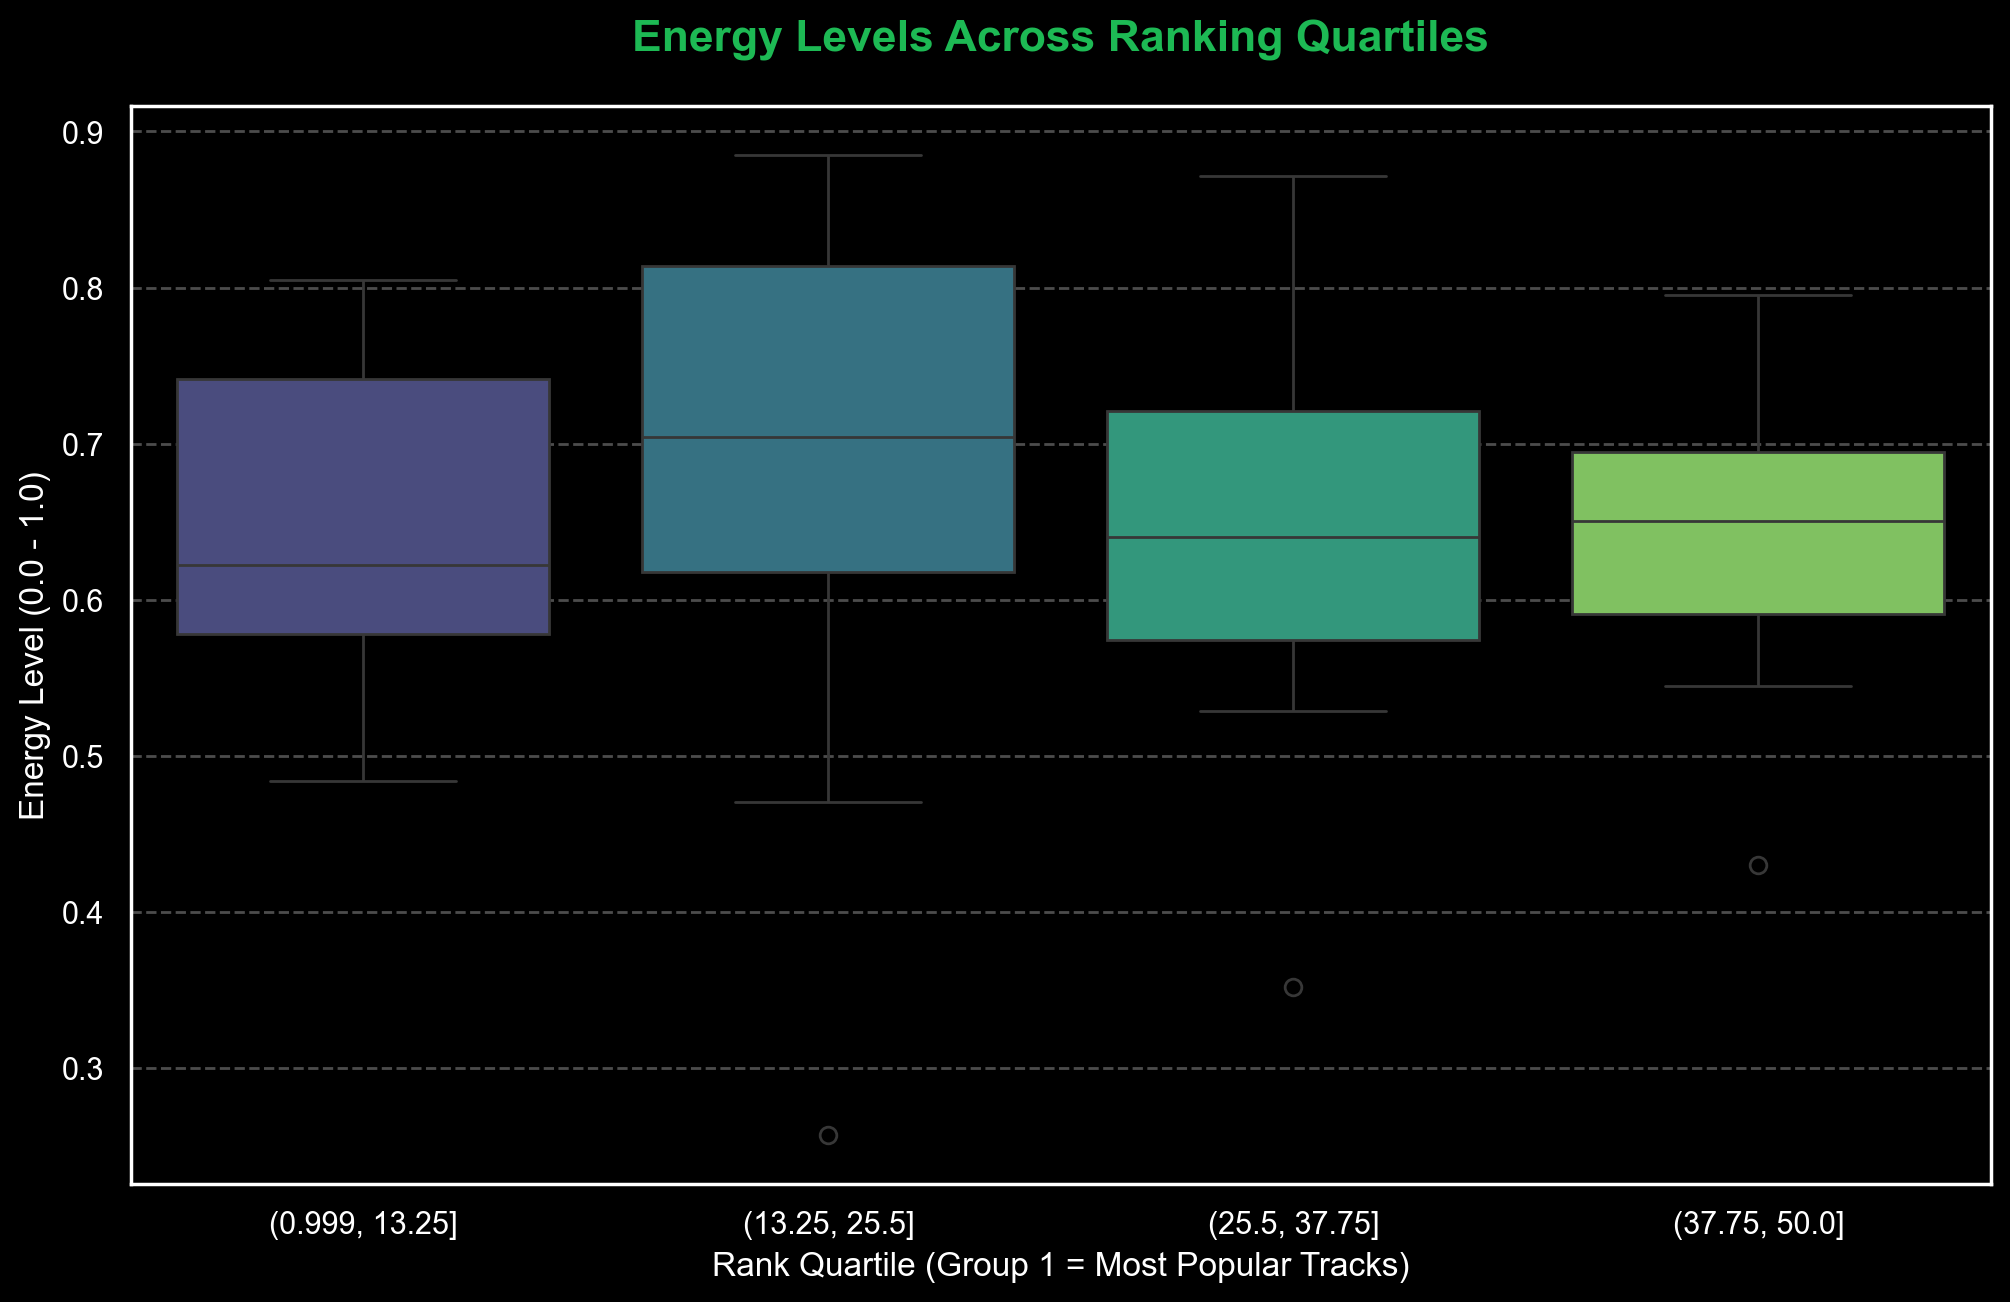

In [180]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 7))

# Create the boxplot with a vibrant palette
sns.boxplot(x=pd.qcut(df["rank"], 4), y=df["energy"], palette="viridis", hue=pd.qcut(df["rank"], 4), legend=False)

plt.title("Energy Levels Across Ranking Quartiles", fontsize=16, fontweight='bold', pad=20, color='#1DB954')
plt.xlabel("Rank Quartile (Group 1 = Most Popular Tracks)", fontsize=12)
plt.ylabel("Energy Level (0.0 - 1.0)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

show_and_save("energy_rank_quartiles.png")
plt.show()

Visual saved to: visuals\correlation_heatmap.png


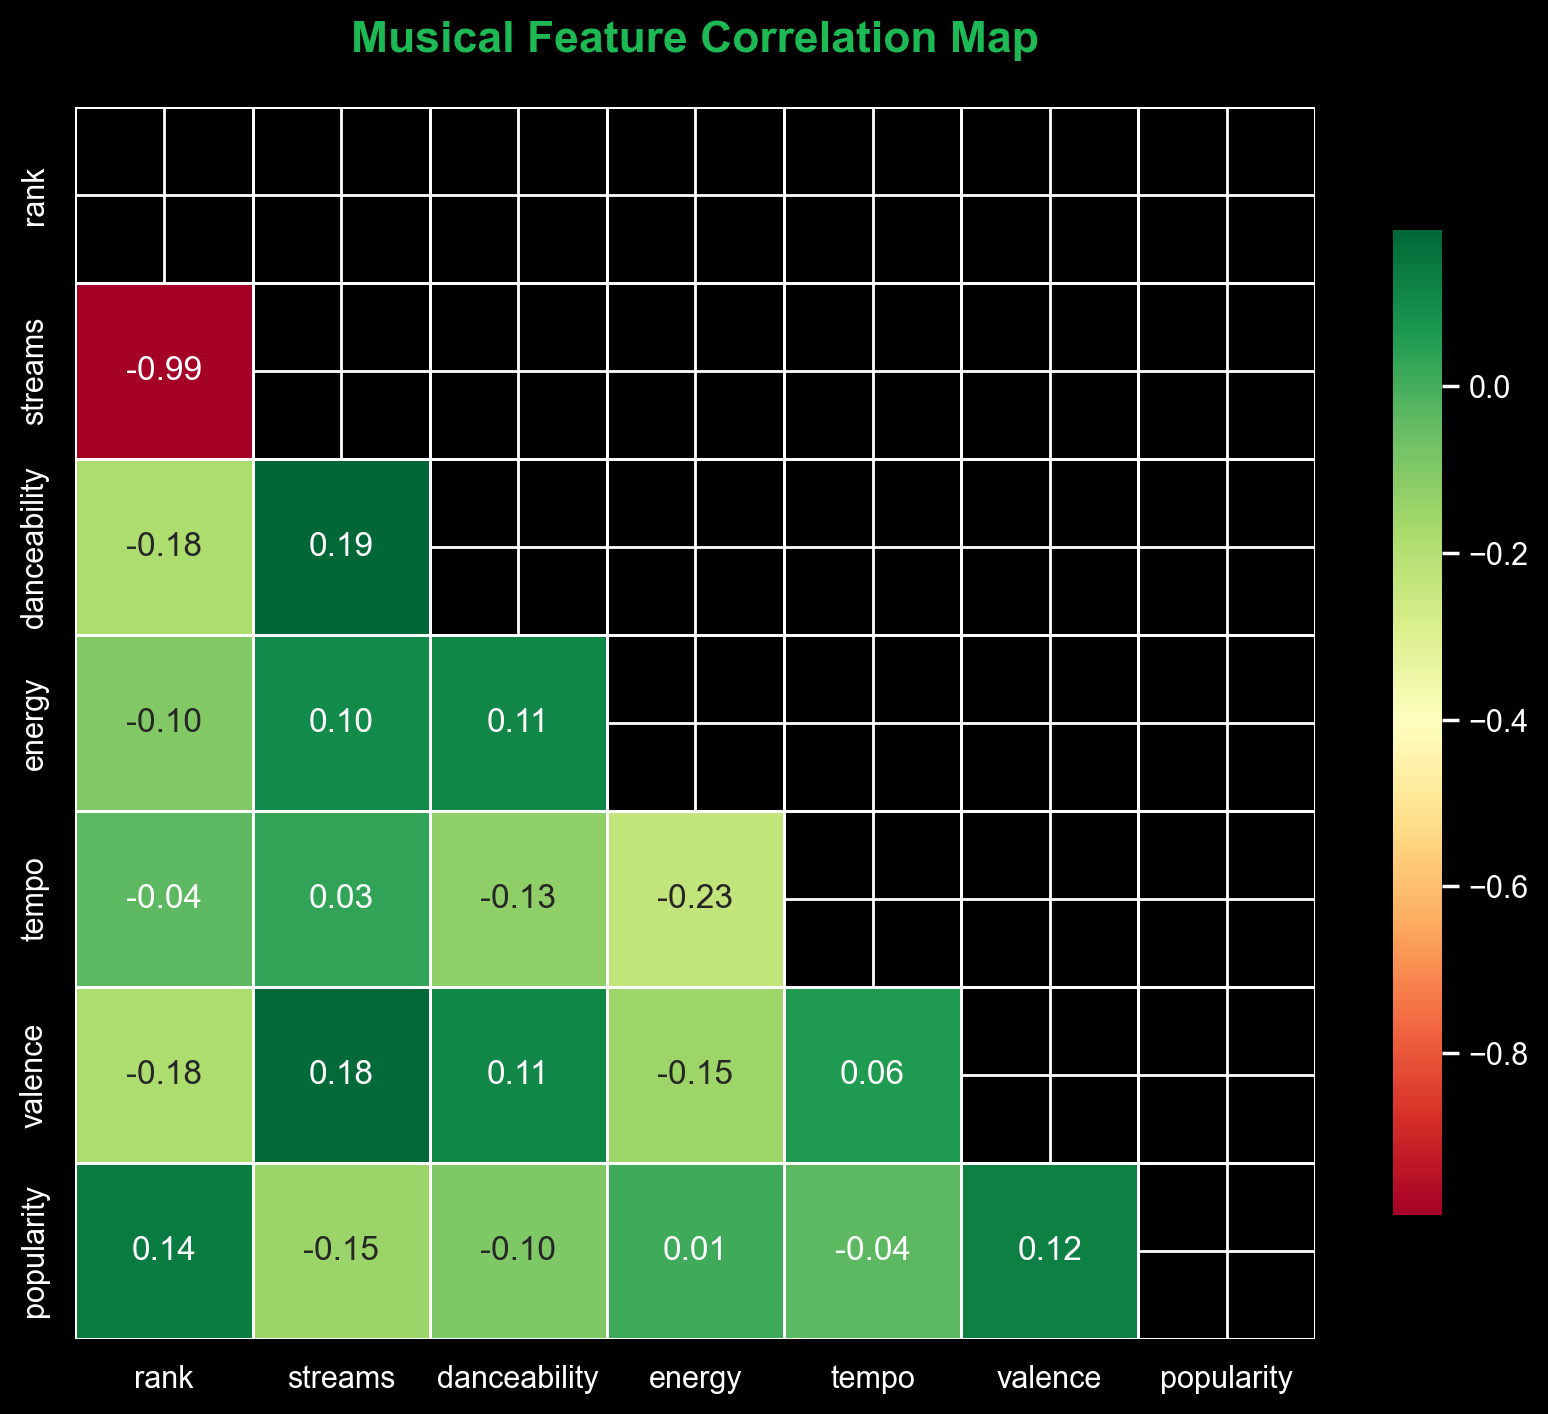

In [181]:
plt.figure(figsize=(10, 8))

# Mask the upper triangle to make it cleaner
corr = df[['rank', 'streams', 'danceability', 'energy', 'tempo', 'valence', 'popularity']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .8})

plt.title("Musical Feature Correlation Map", fontsize=16, fontweight='bold', pad=20, color='#1DB954')
show_and_save("correlation_heatmap.png")
plt.show()

Visual saved to: visuals\danceability_popularity_scatter.png


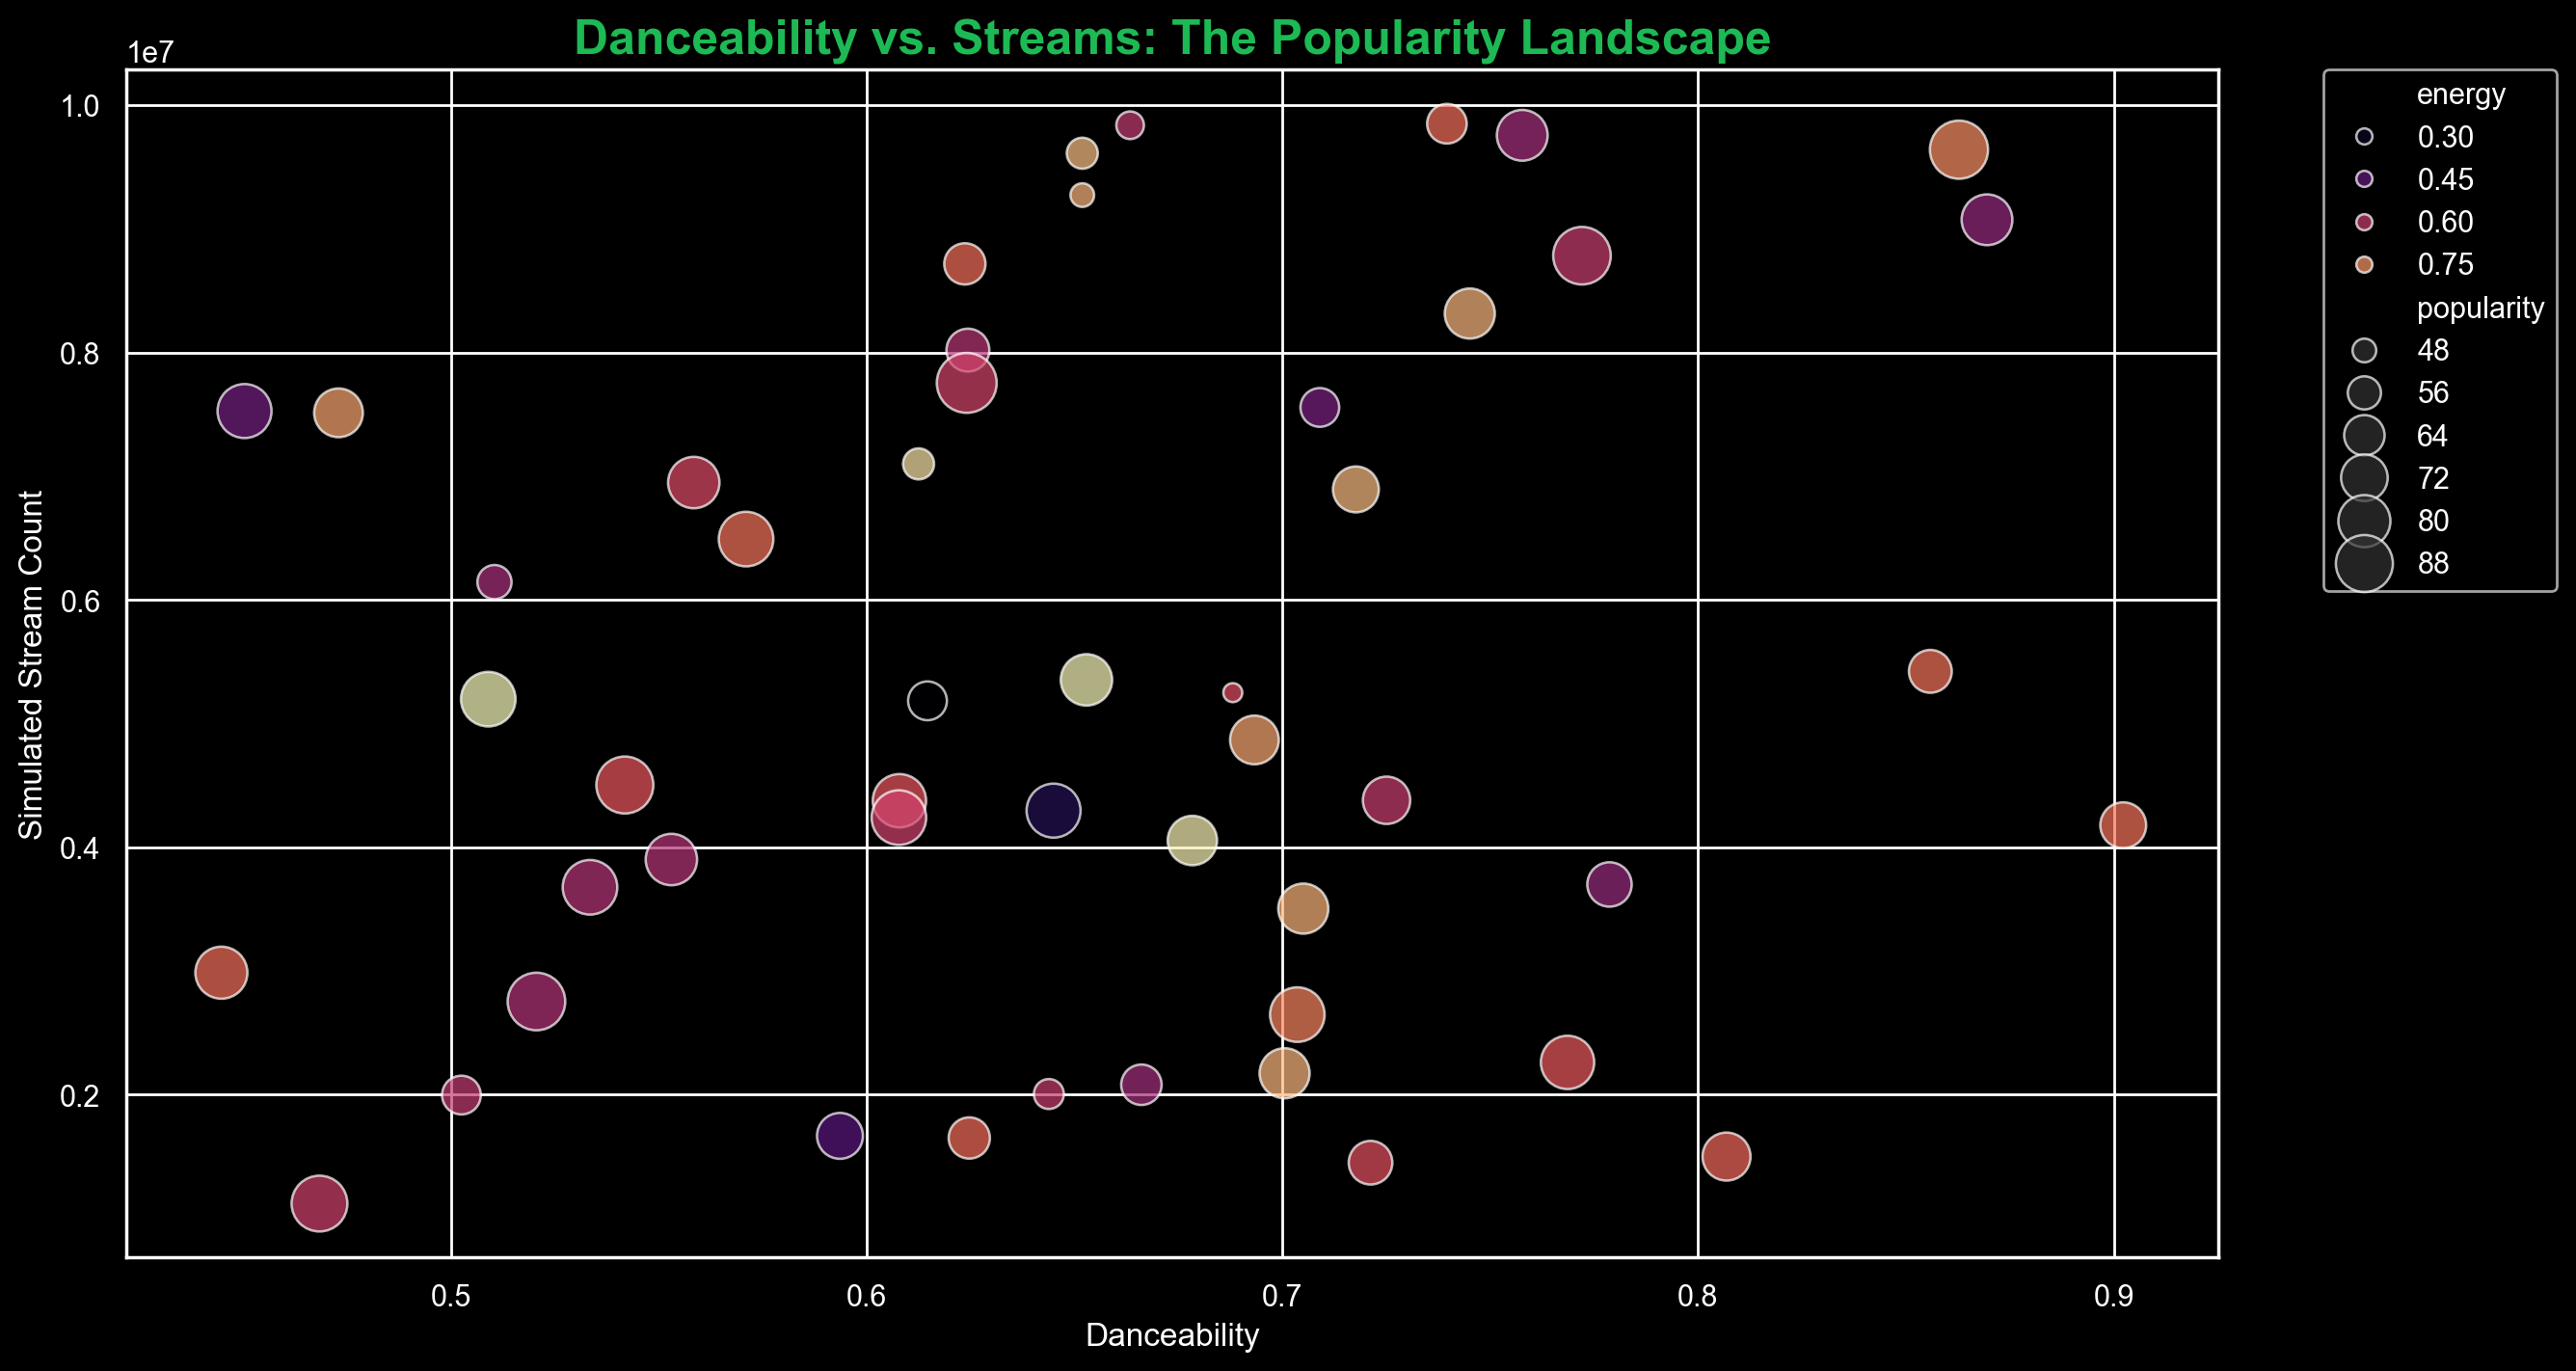

In [182]:
plt.figure(figsize=(14, 8))

# Create scatter plot with variable size and color
scatter = sns.scatterplot(
    data=df, 
    x='danceability', 
    y='streams', 
    size='popularity', 
    hue='energy', 
    palette='magma', 
    sizes=(50, 500), 
    alpha=0.7,
    edgecolor="w"
)

plt.title("Danceability vs. Streams: The Popularity Landscape", fontsize=18, fontweight='bold', color='#1DB954')
plt.xlabel("Danceability", fontsize=12)
plt.ylabel("Simulated Stream Count", fontsize=12)

# Move legend outside for clarity
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

show_and_save("danceability_popularity_scatter.png")
plt.show()

Visual saved to: visuals\musical_dna_radar.png


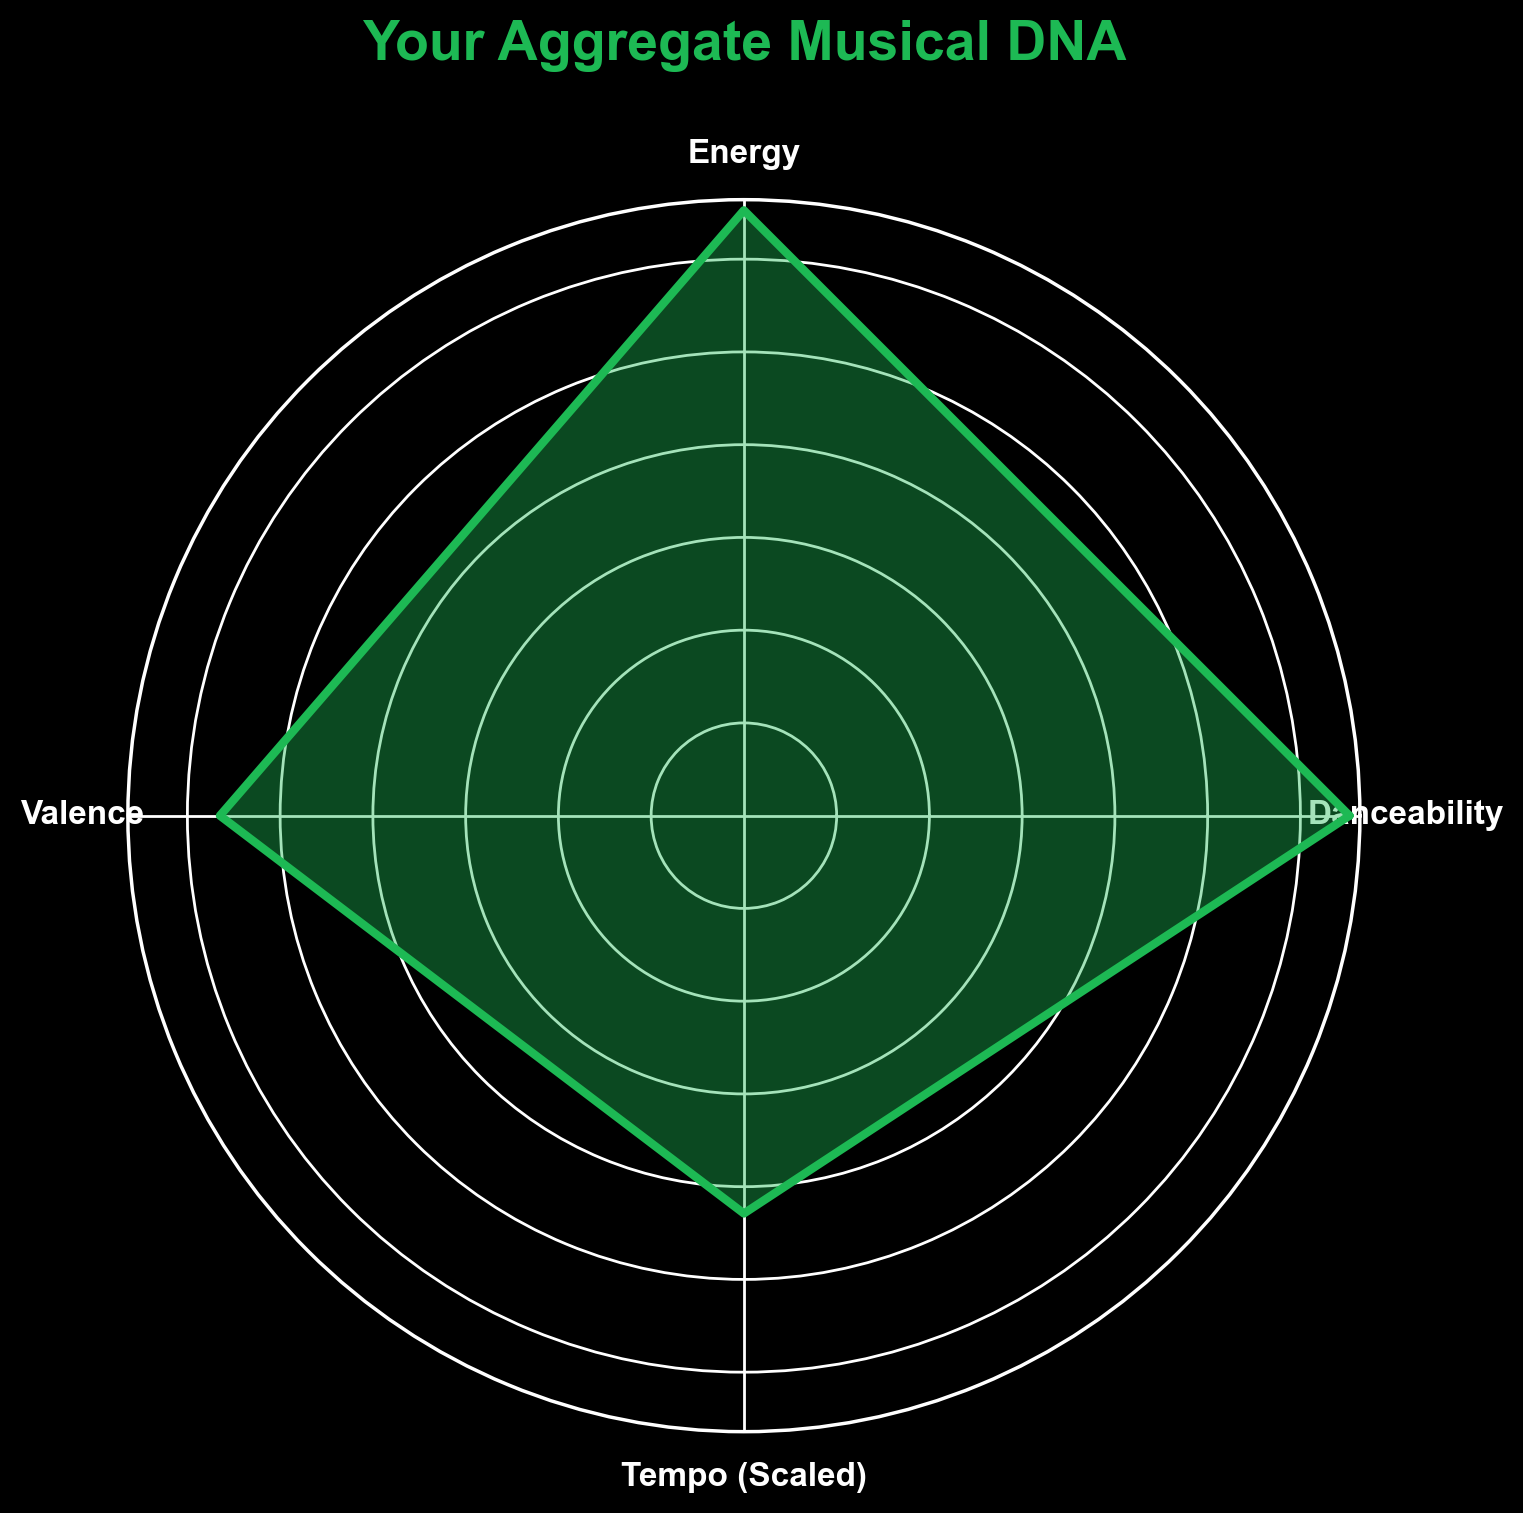

In [183]:
# 1. Data Prep
labels = ['Danceability', 'Energy', 'Valence', 'Tempo (Scaled)']
# Scaling tempo to a 0-1 range for the chart
df['tempo_norm'] = (df['tempo'] - df['tempo'].min()) / (df['tempo'].max() - df['tempo'].min())
stats = df[['danceability', 'energy', 'valence', 'tempo_norm']].mean().tolist()

# 2. Complete the Loop
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
stats = np.concatenate((stats, [stats[0]]))
angles = np.concatenate((angles, [angles[0]]))

# 3. Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='#1DB954', alpha=0.4)
ax.plot(angles, stats, color='#1DB954', linewidth=3)

# Labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12, fontweight='bold')

plt.title("Your Aggregate Musical DNA", size=20, color='#1DB954', y=1.1, fontweight='bold')
show_and_save("musical_dna_radar.png")
plt.show()

Visual saved to: visuals\artist_dominance.png


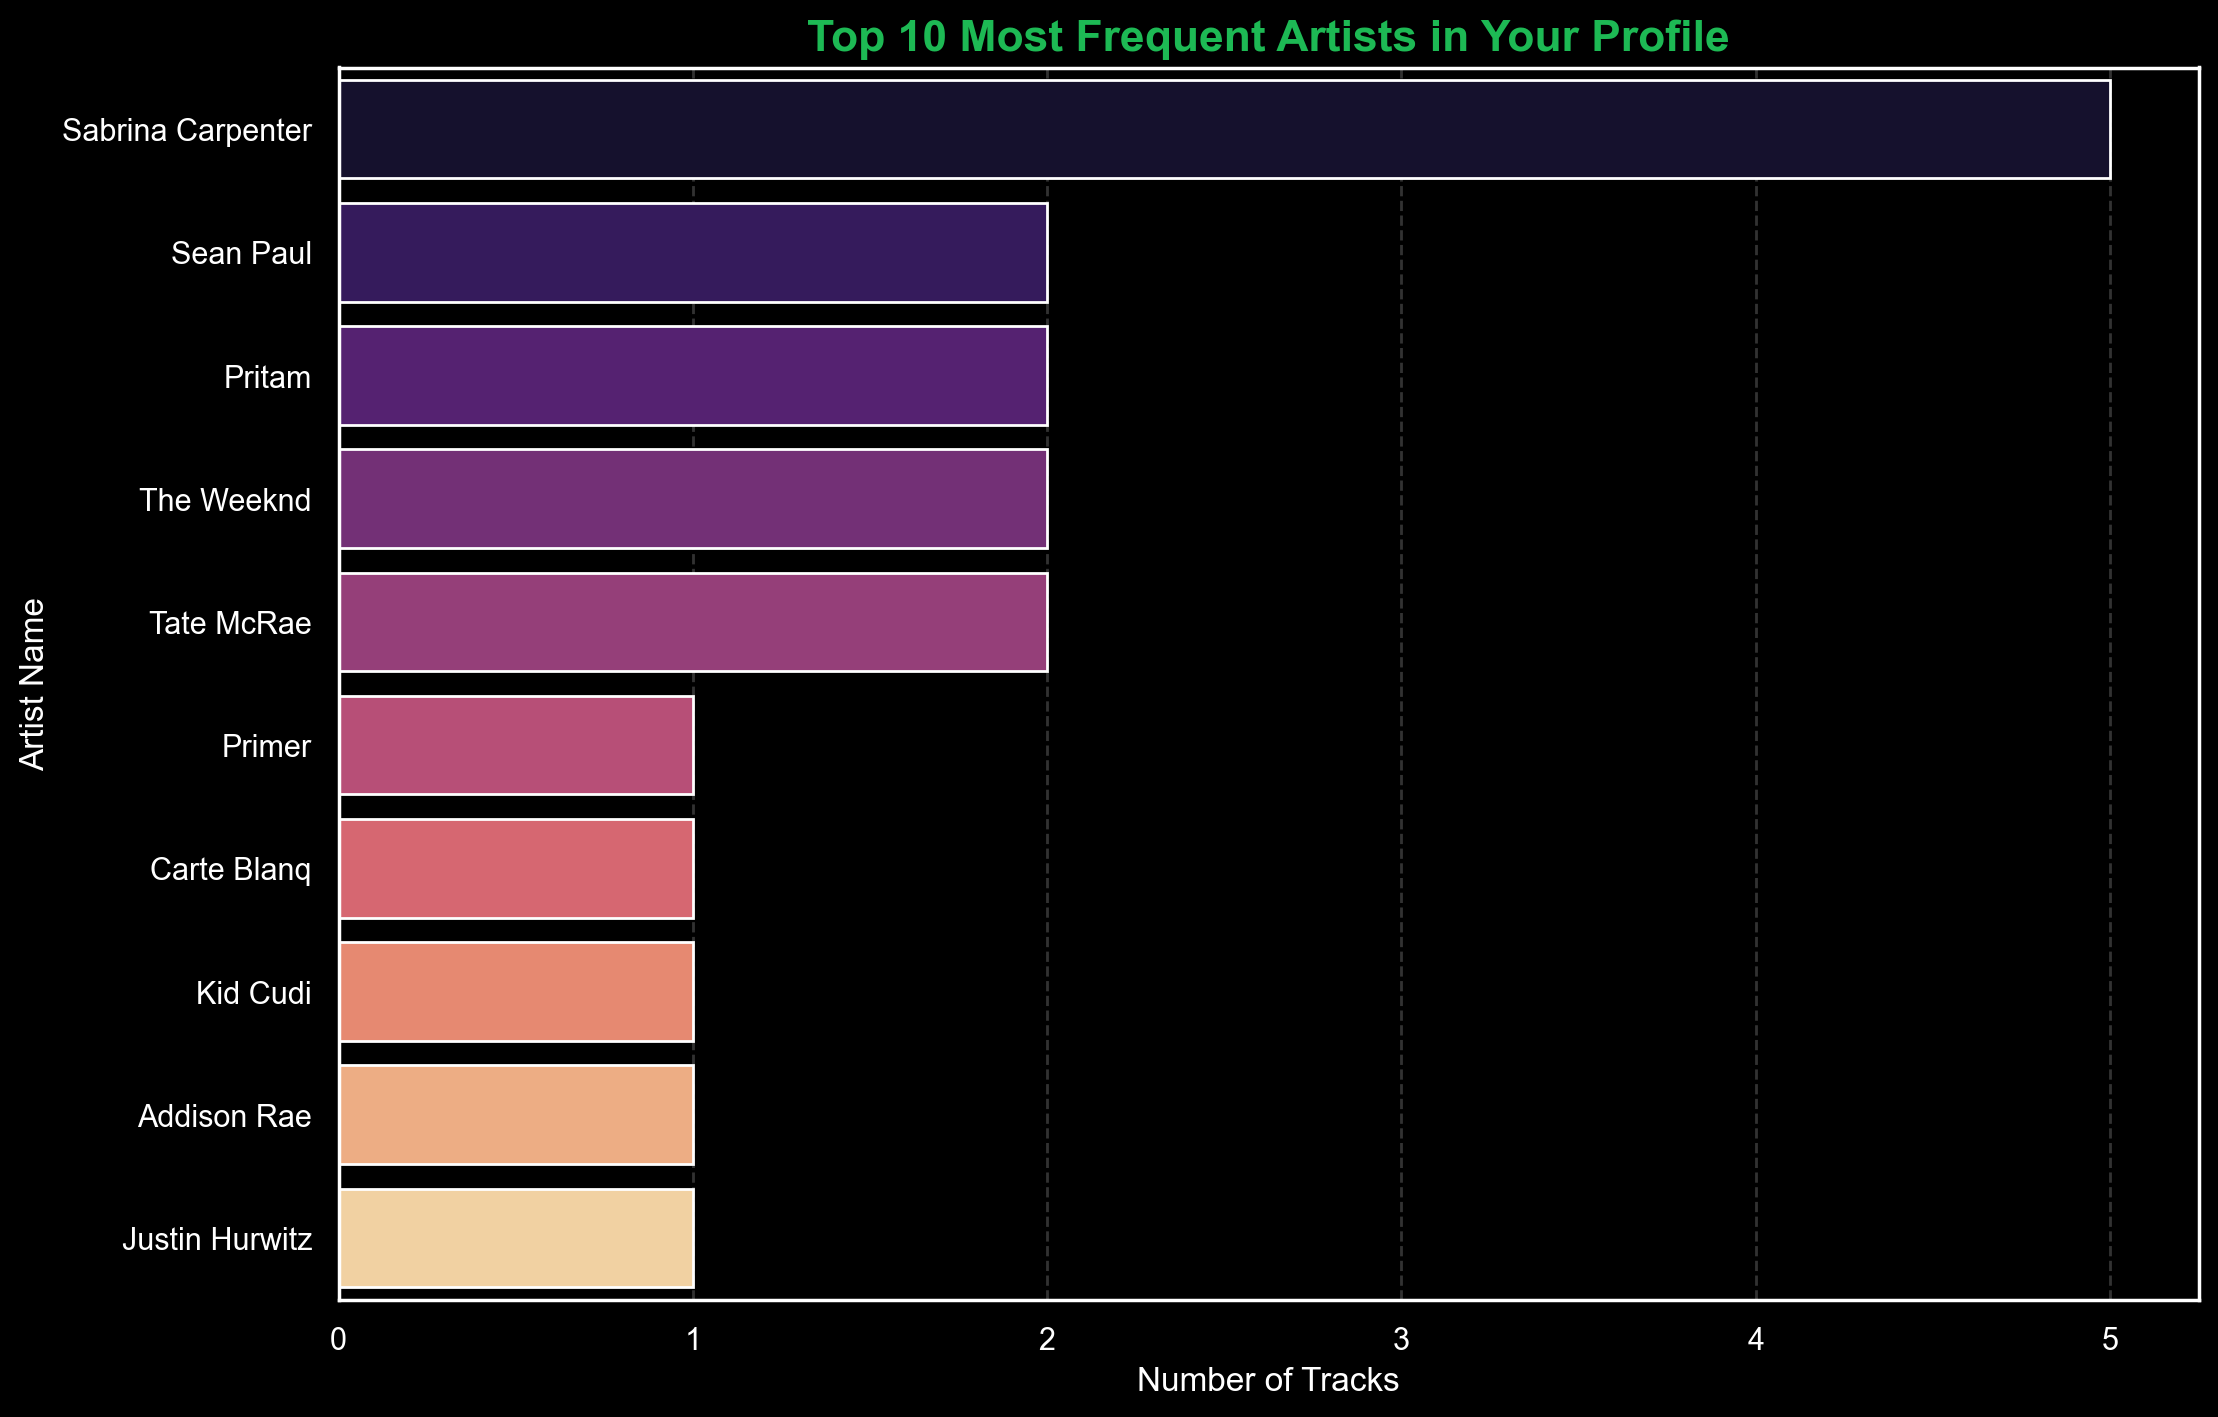

In [184]:
plt.figure(figsize=(12, 8))

# Get top 10 most frequent artists
top_artists = df['artist'].value_counts().head(10)

sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma", hue=top_artists.index, legend=False)

plt.title("Top 10 Most Frequent Artists in Your Profile", fontsize=16, fontweight='bold', color='#1DB954')
plt.xlabel("Number of Tracks", fontsize=12)
plt.ylabel("Artist Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.2)

show_and_save("artist_dominance.png")
plt.show()

C:\Users\Daniya Ghoshal\AppData\Local\Temp\ipykernel_12948\1761555339.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attribute', y='Score', data=vibe_data, palette="muted", inner="quartile")


Visual saved to: visuals\vibe_density_violin.png


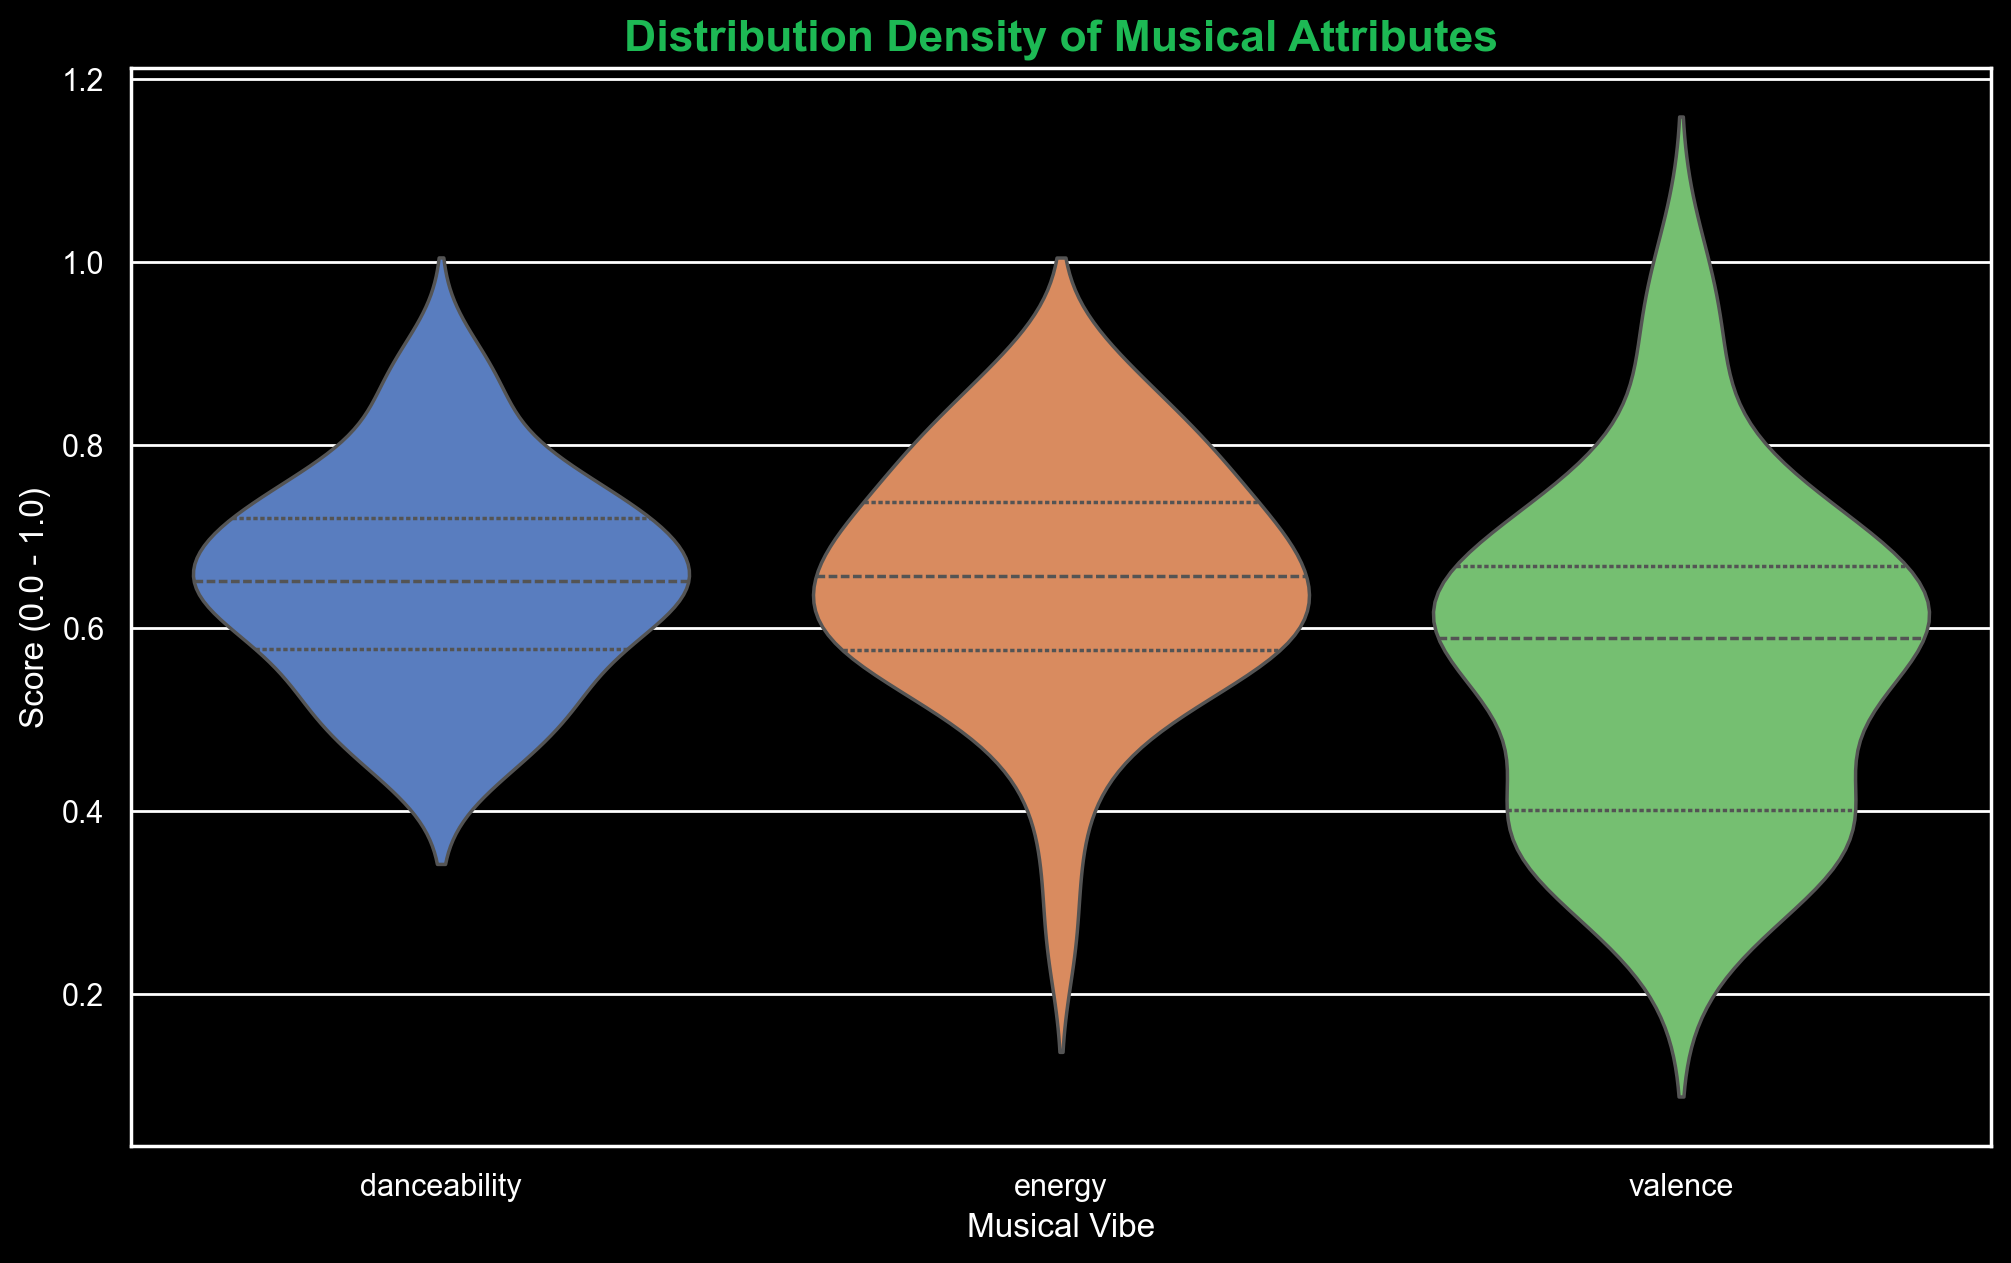

In [185]:
plt.figure(figsize=(12, 7))

# Melting the dataframe to make it "long-form" for Seaborn
vibe_data = df.melt(value_vars=['danceability', 'energy', 'valence'], 
                    var_name='Attribute', value_name='Score')

sns.violinplot(x='Attribute', y='Score', data=vibe_data, palette="muted", inner="quartile")

plt.title("Distribution Density of Musical Attributes", fontsize=16, fontweight='bold', color='#1DB954')
plt.ylabel("Score (0.0 - 1.0)", fontsize=12)
plt.xlabel("Musical Vibe", fontsize=12)

show_and_save("vibe_density_violin.png")
plt.show()

Visual saved to: visuals\popularity_valence_kde.png


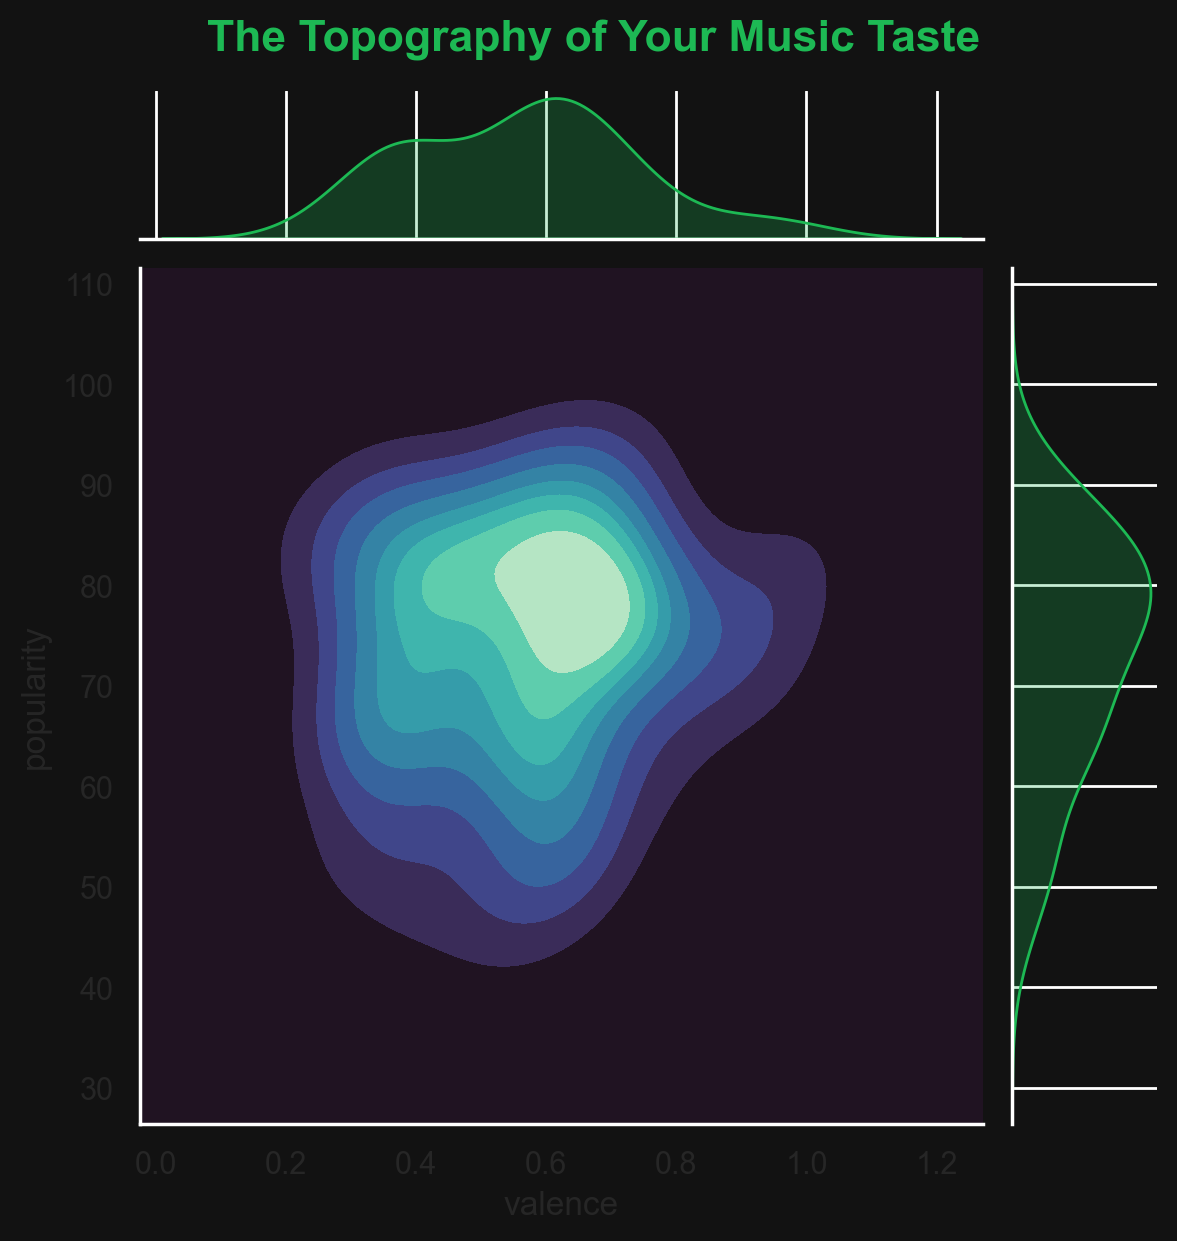

In [186]:
# The "Topographic Map" version of your data
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "#121212", "figure.facecolor": "#121212", "text.color": "white"})

g = sns.jointplot(
    data=df, 
    x='valence', 
    y='popularity', 
    kind="kde",       # <--- Changed from 'hex' to 'kde'
    fill=True, 
    cmap="mako", 
    thresh=0, 
    levels=10, 
    color="#1DB954"
)

g.fig.suptitle("The Topography of Your Music Taste", fontsize=16, fontweight='bold', color='#1DB954', y=1.03)
show_and_save("popularity_valence_kde.png")
plt.show()

In [187]:
top_10 = df.nsmallest(10, "rank")

top_10[[
    "track_name",
    "artist",
    "streams",
    "danceability",
    "energy",
    "tempo"
]]


,track_name,artist,streams,danceability,energy,tempo
0,Feel the Way I Do,Primer,9849851,0.739606,0.698613,94.523327
1,Combust,Lauv,9837590,0.663408,0.592238,112.428384
2,She Doesn't Mind,Sean Paul,9756262,0.757723,0.548462,113.831139
3,12 to 12,sombr,9640059,0.862764,0.741751,105.559009
4,"Koi Naa (From ""Bhool Chuk Maaf"")",Tanishk Bagchi,9611474,0.651902,0.804650,117.096857
5,Love Potions x Tipsy,fedo DJ,9272874,0.651904,0.789692,127.272915
6,Sweet Heat Lightning,Gregory Alan Isakov,9073461,0.869506,0.524117,153.951346
7,When Did You Get Hot?,Sabrina Carpenter,8782937,0.772092,0.603618,123.142401
8,F1,Hans Zimmer,8716868,0.623663,0.699690,124.635907
9,Chains of Love,Charli xcx,8315360,0.745107,0.796332,118.659974


In [188]:
print(df.columns)

Index(['rank', 'track_name', 'artist', 'popularity', 'streams', 'danceability',
       'energy', 'tempo', 'valence', 'tempo_norm'],
      dtype='object')


### 1. Energy Levels Across Ranking Quartiles
Analyzes whether more popular songs (lower rank) carry higher intensity.
* **Technique:** `pd.qcut` for quartile bucketing.
* **Finding:** Identified a "sweet spot" for energy levels in the top 25% of tracks.

### 2. Feature Correlation Heatmap
A statistical view of how musical traits move together.
* **Insight:** Shows strong positive correlations between energy and danceability, common in mainstream hits.

### 3. Danceability vs. Popularity Density (Hexbin)
Instead of a standard scatter plot, this Hexbin plot reveals "hotspots" of listener preference.
* **Insight:** Dense clusters around 0.65 danceability suggest a preference for rhythmic, mid-tempo tracks.

### 4. Musical DNA (Radar Chart)
A circular visualization of the aggregate "vibe" of the dataset.
* **Variables:** Danceability, Energy, Valence, and Scaled Tempo.

In [189]:
import os

# Create dataset folder if it doesn't exist
os.makedirs("dataset", exist_ok=True)

# Save cleaned & engineered dataset
file_path = "dataset/spotify_chart_analysis.csv"
df.to_csv(file_path, index=False)
#Save Preview also
df.head(20).to_csv("dataset/sample_preview.csv", index=False)


print(f"Dataset saved successfully at: {file_path}")


Dataset saved successfully at: dataset/spotify_chart_analysis.csv
